# MTH9879 Homework 4

Assigned: February 22, 2018.
Due: March 8, 2018 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\underbar}{\underline}
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\EE}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.


### 0. (0 points) 
Read Chapter 5 and 6 of Hasbrouck and Chapters 2 and 3 of Foucault, Pagano and R&ouml;ell. 


## Glosten and Milgrom

### 1. (8 points) 

(Adapted from Hasbrouck 5.2 but please note that the setup in (3) in the slides is different from Hasbrouck's in Figure 5.1 of his book.) Consider a variant of the Glosten and Milgrom model where there is informed trading only in the low state $V=\underline V$.

(a) Show that the learned probability after one step that the true price is $\bar V$ is given by

$$
\delta_1(Buy)=\Pr(\bar V|Buy)=\frac{\delta}{1-\mu\,(1-\delta)};\quad \delta_1(Sell)=\Pr(\bar V|Sell)=\frac{\delta}{1+\mu\,(1-\delta)}
$$

and that

$$
A=\frac{\underline V\,{(1-\delta)\,(1-\mu)}+\bar V\,{\delta}}{{1-\mu\,(1-\delta)}};\quad B=\frac{\underline V\,{(1-\delta)\,(1+\mu)}+\bar V\,{\delta}}{1+\mu\,(1-\delta)}
$$

(b) Deduce an expression for the spread $s=A-B$.

(c) Explain the sensitivities of the spread to the parameters of the model to a non-expert.


### Solution

(a)

Since there is informed trading only in the low state, we can modify the probability from the lecture to

$$\mathbb{P}[\bar V \cap \text{Buy}] = \frac12 \delta, \quad \mathbb{P}[\underline V \cap \text{Buy}] = \frac12 (1-\delta)(1-\mu)$$

$$\mathbb{P}[\bar V \cap \text{Sell}] = \frac12 \delta, \quad \mathbb{P}[\underline V \cap \text{Sell}] = \frac12 (1-\delta)(1+\mu)$$

From above we can get

$$\mathbb{P}[\bar V| \text{Buy}] = \frac {\mathbb{P}[\bar V \cap \text{Buy}]} {\mathbb{P}[\bar V \cap \text{Buy}] + \mathbb{P}[\underline V \cap \text{Buy}]} = \frac {\delta} {1-\mu (1-\delta)}$$

$$\mathbb{P}[\bar V| \text{Sell}] = \frac {\mathbb{P}[\bar V \cap \text{Sell}]} {\mathbb{P}[\bar V \cap \text{Sell}] + \mathbb{P}[\underline V \cap \text{Sell}]} = \frac {\delta} {1+\mu (1-\delta)}$$


Then we have

$$A = \bar V \mathbb{P}[\bar V| \text{Buy}] + \underline V (1-\mathbb{P}[\bar V| \text{Buy}]) = \frac {\bar V \delta + \underline V (1-\delta)(1-\mu)} {1-\mu (1-\delta)}$$

$$B = \bar V \mathbb{P}[\bar V| \text{Sell}] + \underline V (1-\mathbb{P}[\bar V| \text{Sell}]) = \frac {\bar V \delta + \underline V (1-\delta)(1+\mu)} {1+\mu (1-\delta)}$$

(b)

$$s=A-B=\frac {2\mu\delta(1-\delta)(\bar V - \underline V)} {1-\mu^2 (1-\delta^2)}$$

(c)

The spread $s$ is 
 - Increasing in value difference $\bar V - \underline V$.
 - Increasing in proportion of informed traders $\mu$.
 - Decreasing in probability $\delta$.


### Load data and R package for the next questions

In [2]:
download.file(url="https://mfe.baruch.cuny.edu/wp-content/uploads/2018/02/tqDataBAC_20170919.zip", destfile="tq.zip")
unzip(zipfile="tq.zip")

In [3]:
load("tqDataBAC_20170919.rData")

Sys.setenv(TZ='EST')
tqBAC <- tqdata

library(highfrequency)
library(xts)

head(tqBAC)

Warning message:
"package 'highfrequency' was built under R version 3.3.3"Loading required package: xts
Warning message:
"package 'xts' was built under R version 3.3.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



                    SYMBOL EX  PRICE    SIZE     COND BID     BIDSIZ OFR    
2017-09-19 09:30:00 "BAC"  "P" "24.7"   "20000"  " "  "24.72" "6"    "24.74"
2017-09-19 09:30:01 "BAC"  "T" "24.71"  "300"    " "  "24.72" "6"    "24.74"
2017-09-19 09:30:01 "BAC"  "P" "24.7"   "100"    " "  "24.72" "6"    "24.74"
2017-09-19 09:30:02 "BAC"  "N" "24.73"  "429950" " "  "24.72" "6"    "24.74"
2017-09-19 09:30:02 "BAC"  "N" "24.72"  "100"    " "  "24.72" "35"   "24.74"
2017-09-19 09:30:03 "BAC"  "T" "24.725" "200"    " "  "24.72" "9"    "24.73"
                    OFRSIZ
2017-09-19 09:30:00 "100" 
2017-09-19 09:30:01 "100" 
2017-09-19 09:30:01 "100" 
2017-09-19 09:30:02 "100" 
2017-09-19 09:30:02 "420" 
2017-09-19 09:30:03 "4"   

## The Lee and Ready tick test

### 2. (10 points) 

In the following use the trades and quotes object *tqBAC* in the loaded data *tq.rData*.  Denote trade prices by $p_t$ and mid-quotes by $m_t$.

(a) Compute the time series of trade signs $\epsilon_t$ according to $\epsilon_t=+1$ if $p_t>m_t$ and  $\epsilon_t=-1$ otherwise, using the Lee-Ready rule for trades at mid.  Name this series `tradeSigns`. (Note this was already done in the lecture.)

(b) Compute the Lee-Ready trade-sign indicator time series (as if you didn't have quotes and so no mid-prices).

(c) Compute the correlation of these two indicators.

(d) Assume the rule in part (a) is 100% accurate.  What percentage of trades are correctly signed by the Lee-Ready test?

(e) Explain the relationship between your answers in (c) and (d).


### Solution

(a)

In [4]:
tradeSigns <- getTradeDirection(tqBAC)
head(tradeSigns)

[1] -1 -1 -1  1 -1  1

(b)

In [10]:
prices <- as.numeric(tqBAC$PRICE)
len <- length(prices)
LRTradeSigns <- rep(1, len)

# Lee-Ready trade-sign indicator
for (i in 2:len) {
    if (prices[i] > prices[i-1])
        LRTradeSigns[i] <- 1
    else if (prices[i] < prices[i-1])
        LRTradeSigns[i] <- -1
    else
        LRTradeSigns[i] <- LRTradeSigns[i-1]
}
        
head(LRTradeSigns)

[1]  1  1 -1  1 -1  1

(c)

In [13]:
corr <- cor(tradeSigns, LRTradeSigns)
corr

[1] 0.6995745

(d)

In [14]:
rate <- (corr+1)/2
rate

[1] 0.8497873

(e)

Correct rate is 0% when correlation is -1 and 100% when correlation is 1. Therefore the relationship is

$$rate=\frac{corr+1}{2}$$

## Realized spread by exchange

### 3. (8 points)

(a) Reproduce Figure 6 from the lecture slides, making sure to get the aesthetics right.

(b) Explain why the realized spread profile varies by exchange.

(c) Redo the picture adjusting for the following (assumed) take fees:

** Exchange ** | ** Take fee ** 
--- | ---: 
| (**cents**)
Y | -0.05 
N | 0.28
B | -0.01
J | 0.03
V | 0.03
T | 0.30

(d) Based on your results, where would you advise sending a market order?


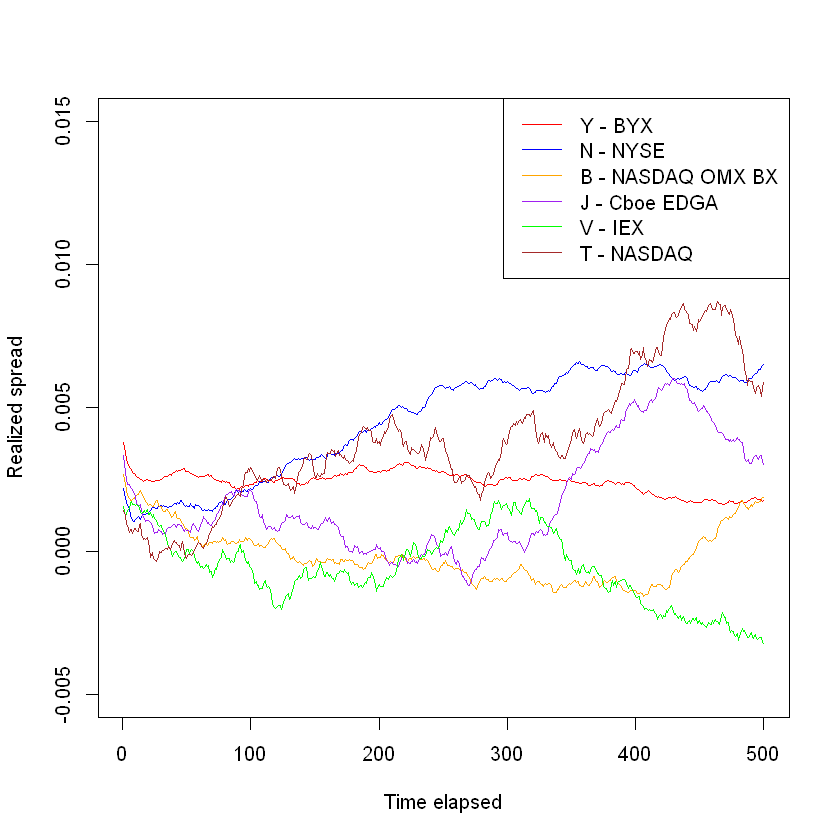

In [21]:
# Function to calculate realized spread curve
rsLag <- function(ex) {
    set <- tqBAC[tqBAC$EX==ex]
    mids <- (as.numeric(set$OFR) + as.numeric(set$BID)) / 2
    prices <- as.numeric(set$PRICE)
    len <- length(prices)
    tradeSigns <- getTradeDirection(set)
    rs <- function(lag){mean(tradeSigns[1:(len-lag)]*(prices[1:(len-lag)]-mids[-(1:lag)]))}
    rsLag <- sapply(1:500, rs)
    return (rsLag)
}

# Calculate realized spread curve for different exchanges
rsLagY <- rsLag('Y')
rsLagN <- rsLag('N')
rsLagB <- rsLag('B')
rsLagJ <- rsLag('J')
rsLagV <- rsLag('V')
rsLagT <- rsLag('T')


# Plot the results
plot(1:500, rsLagY, col="red", type="l", xlab="Time elapsed", ylab="Realized spread", ylim=c(-0.005, 0.015))
lines(1:500, rsLagN, col="blue")
lines(1:500, rsLagB, col="orange")
lines(1:500, rsLagJ, col="purple")
lines(1:500, rsLagV, col="green")
lines(1:500, rsLagT, col="brown")
legend("topright", 
       c("Y - BYX", "N - NYSE", "B - NASDAQ OMX BX", "J - Cboe EDGA", "V - IEX", "T - NASDAQ"),
       lty = c(1,1,1,1,1,1), 
       col=c("red","blue","orange","purple","green","brown"))

## Predicting trade signs

### 4. (10 points) 

The following require the `tradeSigns` series from Problem 2.

(a) Denote the probability of a sign reversal by $\pi$.  Derive an expression in terms of $\pi$ for the conditional expectation $\E[\epsilon_t|\epsilon_{t-1}]$.

(b) Assume zero expectation of the trading signs, fit an AR(1) model to the series `tradeSigns`.  What is the coefficient returned by this model?  Explain how  this coefficient relates to $\pi$?

(c) Fit an AR(p) model to the series `tradeSigns`, letting R determine the optimal order $p$.  How many coefficients does R think are significant?

(d) Use the prediction variance output of the `ar` function to assess how much better the AR(p) model is than the AR(1) model at predicting order signs?


## The MRR model

### 5. (6 points)
Using the estimate of $\rho$ (the coefficient obtained from fitting to an AR(1) model) from Problem 4 and equation (11) from the lecture slides:

$$
\Delta p_t=(\phi+\lambda)\,\epsilon_t-(\phi+\rho\,\lambda)\,\epsilon_{t-1}+e_t+\Delta \xi_t
$$

estimate by linear regression the MRR parameters $\phi$ (transaction cost) and $\lambda$ (adverse selection or "Kyle lambda") from  *tqBAC*.  This amounts to ignoring the autocorrelation of the $\Delta \xi_t$.
<br>

Hint: Use the R function `lm`  to perform the linear regressions.